Import NumPy and SciPy (not needed when using --pylab)

In [1]:
%pylab inline
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


Load data from file

In [2]:
zz = np.loadtxt('wiggleZ_DR1_z.dat',dtype='float'); # Load WiggleZ redshifts

In [3]:
np.min(zz) # Check bounds

1.0000000000000001e-05

In [4]:
np.max(zz)

1.9903999999999999

**Construct histogram from data**

There are several histrogram commands: hist() will be fine here, but note the syntax below. Also note that the bin *edges* are returned, so that there will nbins+1 of these.

In [5]:
nbins = 50; # Is this a good choice? 

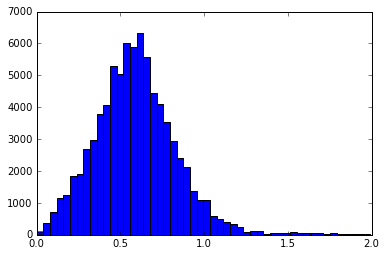

In [6]:
n, bins, patches = hist(zz,nbins)

In [7]:
x = bins[0:nbins] + (bins[2]-bins[1])/2; # Convert bin edges to centres, chopping the last

Interpolate histogram output -> p(z); n.b. that you can also use numerical quadrature to get $P(z)$ directly.

In [8]:
# Import the function you need
from scipy.interpolate import interp1d

In [9]:
# Build an interpolation function for p(z) that accepts an arbitrary redshift z
zdist = interp1d(x,n, kind='cubic', bounds_error = False, fill_value=0)

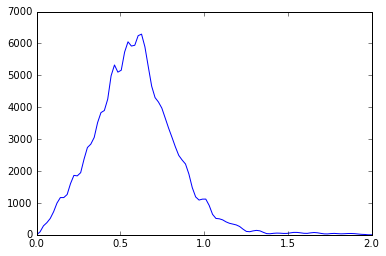

In [11]:
z = linspace(0,2,100); plot(z,zdist(z)) # Test your interpolation function out

Use numerical integration to get $P(z) = \int_0^\infty p(z') dz'$

In [14]:
# Import the function you need
from scipy import integrate

In [15]:
intPz = lambda z0: integrate.quad(zdist,0,z0)[0]

In [16]:
total = intPz(5) # Get normalisation constant by evaluating P(z->\infty)

/Users/n01063296/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [17]:
total # Check that this worked

3232.793814634377